In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [2]:
# Генерация сигнала ЭКГ

In [3]:
from scipy.misc import electrocardiogram
ecg = electrocardiogram()

<ipython-input-3-c977202eb7ed>:2: DeprecationWarning: scipy.misc.electrocardiogram has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.electrocardiogram instead.
  ecg = electrocardiogram()


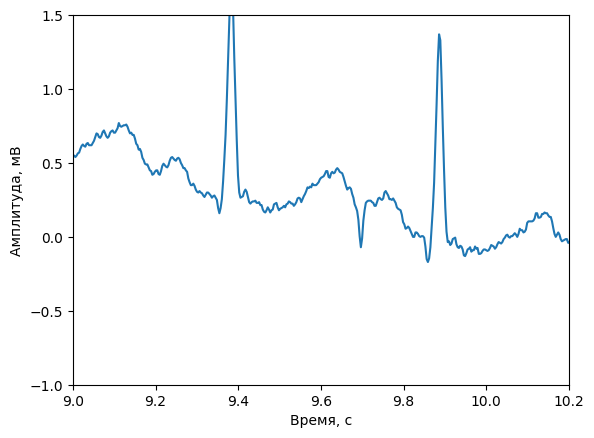

In [4]:
fs = 333
time = np.arange(ecg.size) / fs
plt.plot(time, ecg)
plt.xlabel("Время, с")
plt.ylabel("Амплитуда, мВ")
plt.xlim(9, 10.2)
plt.ylim(-1, 1.5)
plt.show()

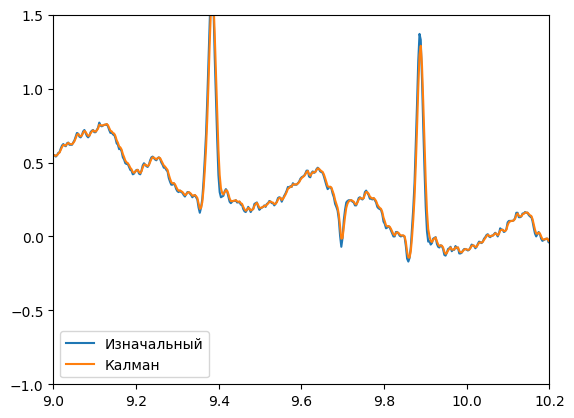

In [10]:
def custom_filter(data, time, a=0.6, b=0.00001):
    filtered_data = [data[0]]
    derivative_prev = 0
# Обновление состояния фильтра Калмана и обновление состояния системы на основе нового измерения
    for i in range(1, len(time)):
        d_t = time[i] - time[i-1]
        a_d = a * (data[i] - filtered_data[-1])
        b_d = b * (data[i] - derivative_prev)

        filtered_value = filtered_data[-1] + a_d
        derivative = derivative_prev + b_d / d_t
        filtered_value += d_t * derivative

        filtered_data.append(filtered_value)
        derivative_prev = derivative

    return filtered_data

filtered_data = custom_filter(ecg, time)

plt.plot(time, ecg, label="Изначальный")
plt.plot(time, filtered_data, label="Калман")
plt.xlim(9, 10.2)
plt.ylim(-1, 1.5)
plt.legend()